In [352]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [353]:
dataset = pd.read_csv('customers.csv')
dataset.head()


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A


In [354]:
index = dataset.index
number_of_rows = len(index)

print(number_of_rows)

8068


In [355]:
dataset.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [356]:
dataset.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [357]:
# sns.histplot(data=dataset,hue=)

In [358]:
#fill ever Mairred
from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

dataset["Ever_Married"]
imputer = SimpleImputer(strategy='most_frequent', 
                        missing_values=np.nan)
imputer = imputer.fit(dataset[['Ever_Married','Profession','Graduated']])
dataset[['Ever_Married','Profession','Graduated']] = imputer.transform(dataset[['Ever_Married','Profession','Graduated']])





In [359]:
#fill age and work ex
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(dataset[['Age','Work_Experience','Family_Size']])
dataset[['Age','Work_Experience','Family_Size']] = imputer.transform(dataset[['Age','Work_Experience','Family_Size']])


In [360]:
dataset.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Segmentation       0
dtype: int64

In [361]:
dataset.Ever_Married

0        No
1       Yes
2       Yes
3       Yes
4       Yes
       ... 
8063     No
8064     No
8065     No
8066     No
8067    Yes
Name: Ever_Married, Length: 8068, dtype: object

In [362]:
dataset.hist

<bound method hist_frame of       Gender Ever_Married   Age Graduated     Profession  Work_Experience  \
0       Male           No  22.0        No     Healthcare              1.0   
1     Female          Yes  38.0       Yes       Engineer              1.0   
2     Female          Yes  67.0       Yes       Engineer              1.0   
3       Male          Yes  67.0       Yes         Lawyer              0.0   
4     Female          Yes  40.0       Yes  Entertainment              1.0   
...      ...          ...   ...       ...            ...              ...   
8063    Male           No  22.0        No         Artist              0.0   
8064    Male           No  35.0        No      Executive              3.0   
8065  Female           No  33.0       Yes     Healthcare              1.0   
8066  Female           No  27.0       Yes     Healthcare              1.0   
8067    Male          Yes  37.0       Yes      Executive              0.0   

     Spending_Score  Family_Size Segmentation  

[Text(0.5, 1.0, 'gender distribution over segments')]

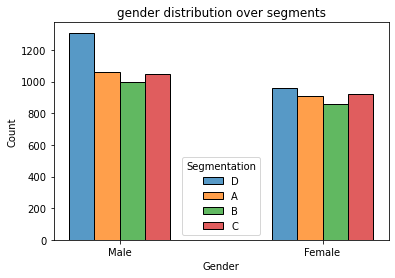

In [363]:
sns.histplot(data=dataset,x="Gender",hue="Segmentation",multiple="dodge",shrink=0.5  ).set(title='gender distribution over segments')

[Text(0.5, 1.0, 'marital status distribution over segments')]

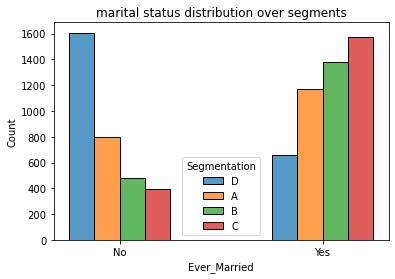

In [364]:
sns.histplot(data=dataset,x="Ever_Married",hue="Segmentation",multiple="dodge",shrink=0.5  ).set(title='marital status distribution over segments')

[Text(0.5, 1.0, 'the age histogram')]

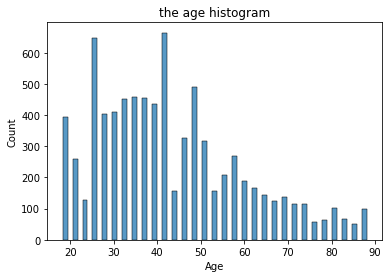

In [365]:
sns.histplot(data=dataset,x="Age",shrink=0.5  ).set(title='the age histogram')

[Text(0.5, 1.0, '  Work Experience histogram')]

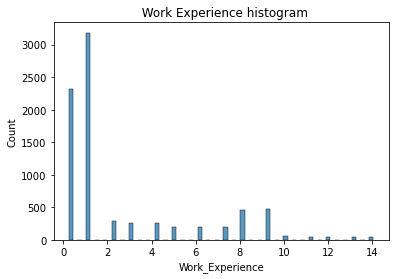

In [366]:
sns.histplot(data=dataset,x="Work_Experience",shrink=0.5  ).set(title='  Work Experience histogram')

[Text(0.5, 1.0, ' age distribution over segments')]

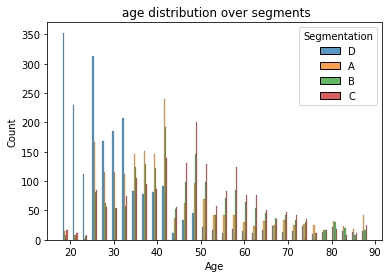

In [367]:
sns.histplot(data=dataset,x="Age",hue="Segmentation",multiple="dodge",shrink=0.5  ).set(title=' age distribution over segments')

part2............ Modeling

In [368]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
X

array([['Male', 'No', 22.0, ..., 1.0, 'Low', 4.0],
       ['Female', 'Yes', 38.0, ..., 1.0, 'Average', 3.0],
       ['Female', 'Yes', 67.0, ..., 1.0, 'Low', 1.0],
       ...,
       ['Female', 'No', 33.0, ..., 1.0, 'Low', 1.0],
       ['Female', 'No', 27.0, ..., 1.0, 'Low', 4.0],
       ['Male', 'Yes', 37.0, ..., 0.0, 'Average', 3.0]], dtype=object)

In [369]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 3] = le.fit_transform(X[:, 3])
X[:, 4] = le.fit_transform(X[:, 4])
X[:, 6] = le.fit_transform(X[:, 6])
Y=le.fit_transform(Y)
print(Y)
# X[:,4]
# dataset['Gender']

[3 0 1 ... 3 1 1]


In [389]:
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from collections import Counter

# strat= {
#     0: 2190,
#     1:1951,
#     2:2502,
#     3:2268 
# }
# over_sample=SMOTE(sampling_strategy=strat)
# X,Y=over_sample.fit_resample(X,Y)
# counter=Counter(Y)
# for i,j in counter.items():
#     per=j/len(Y)*100
#     print("class = " ,i)
#     print("n=",j)
#     print("per= ",per)

...

# print("len(X)",len(X))
# # define oversampling strategy
# oversample = RandomOverSampler(sampling_strategy='minority')
# X,Y=oversample.fit_resample(X,Y)
# print("len(X)",len(X))

len(X) 8478
len(X) 8776


In [371]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, [2,5,7]] = sc.fit_transform(X[:, [2,5,7]])
X[:,2].min()

-1.5421275425788359

In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [373]:
len(X_train)

5934

In [374]:
X_test

array([[1, 1, 0.13488344077610953, ..., -0.44628753370936636, 2,
        -0.5671277768382662],
       [0, 1, 0.07499019137057578, ..., -0.7547269003669035, 2,
        -1.235477692328233],
       [1, 0, -0.22447605565709305, ..., -0.44628753370936636, 2,
        -0.5671277768382662],
       ...,
       [1, 0, -0.4041558038736943, ..., -0.44628753370936636, 2,
        -1.235477692328233],
       [1, 0, -0.7036220509013632, ..., -0.7547269003669035, 2,
        0.7695720541416671],
       [1, 0, -1.4822342931733021, ..., -0.44628753370936636, 2,
        0.7695720541416671]], dtype=object)

In [375]:
print(X_test)

[[1 1 0.13488344077610953 ... -0.44628753370936636 2 -0.5671277768382662]
 [0 1 0.07499019137057578 ... -0.7547269003669035 2 -1.235477692328233]
 [1 0 -0.22447605565709305 ... -0.44628753370936636 2 -0.5671277768382662]
 ...
 [1 0 -0.4041558038736943 ... -0.44628753370936636 2 -1.235477692328233]
 [1 0 -0.7036220509013632 ... -0.7547269003669035 2 0.7695720541416671]
 [1 0 -1.4822342931733021 ... -0.44628753370936636 2 0.7695720541416671]]


In [376]:
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [377]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 1, 3, ..., 3, 3, 3])

In [378]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[233 162 110 116]
 [151 322 119  62]
 [123 172 247  56]
 [140  93  48 390]]


In [379]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[233 162 110 116]
 [151 322 119  62]
 [123 172 247  56]
 [140  93  48 390]]


In [380]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy = ",accuracy)

accuracy =  0.46855345911949686


In [381]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=5,
                             min_weight_fraction_leaf=0.0, random_state=0, n_estimators=300)

rfc.fit(X_train, y_train)


acc_random_forest = round(rfc.score(X_train, y_train) * 100, 2)


# Predicting the Test set results
RF_yp = rfc.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, RF_yp)
print(cm)

# Count accuracy
accuracy = accuracy_score(y_test, RF_yp)
print("Random Forest accuracy = " , accuracy)


[[252 175  62 132]
 [119 322 137  76]
 [ 61 165 296  76]
 [128  62  16 465]]
Random Forest accuracy =  0.5247641509433962


Text(0.5, 0, 'Feature Importance')

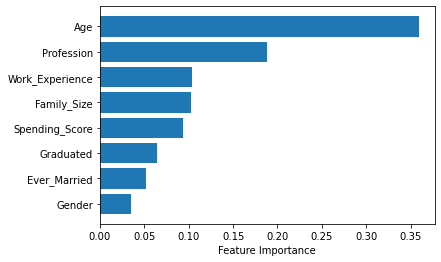

In [382]:
sort = rfc.feature_importances_.argsort()

plt.barh(dataset.columns[sort], rfc.feature_importances_[sort])
plt.xlabel("Feature Importance")


Predict the segments of the 282 new customers in the csv file (new_customers.csv)


In [383]:
newdata = pd.read_csv('new_customers.csv')
newdata.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,Male,Yes,61,Yes,Doctor,5,Low,3
1,Female,Yes,88,Yes,Lawyer,1,Average,4
2,Male,No,31,No,Artist,1,Low,2
3,Male,Yes,60,Yes,Artist,2,Average,5
4,Female,Yes,51,Yes,Artist,3,Average,6


In [384]:
newX = newdata.iloc[:, :].values

le = LabelEncoder()
newX[:, 0] = le.fit_transform(newX[:, 0])
newX[:, 1] = le.fit_transform(newX[:, 1])
newX[:, 3] = le.fit_transform(newX[:, 3])
newX[:, 4] = le.fit_transform(newX[:, 4])
newX[:, 6] = le.fit_transform(newX[:, 6])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
newX[:, [2,5,7]] = sc.fit_transform(newX[:, [2,5,7]])
newX


array([[1, 1, 1.1184189736966854, ..., 0.8663159451014686, 2,
        0.08949912131872145],
       [0, 1, 2.698022398984492, ..., -0.45601745960009643, 0,
        0.7204679266157068],
       [1, 0, -0.636695943289766, ..., -0.45601745960009643, 2,
        -0.5414696839782639],
       ...,
       [1, 1, 0.24086151520345975, ..., 0.8663159451014686, 2,
        -1.1724384892752493],
       [0, 0, 0.6503883291669651, ..., -0.7866008107754877, 2,
        -0.5414696839782639],
       [0, 0, 0.06535002350481459, ..., 2.1886493498030335, 2,
        0.08949912131872145]], dtype=object)

In [385]:
newY = rfc.predict(newX)
newY


array([0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 1, 3, 1, 0, 1,
       2, 2, 0, 1, 1, 0, 1, 1, 3, 1, 0, 1, 1, 3, 2, 0, 0, 1, 0, 3, 1, 0,
       0, 2, 3, 0, 1, 3, 0, 0, 2, 3, 3, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3,
       0, 0, 3, 1, 1, 3, 1, 1, 3, 0, 0, 3, 3, 3, 2, 1, 1, 3, 1, 2, 2, 2,
       1, 0, 2, 3, 3, 3, 3, 0, 3, 3, 2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 0, 3,
       3, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 1, 3, 2, 2, 1, 3, 3, 3, 3, 3, 3,
       0, 1, 3, 0, 2, 1, 3, 3, 3, 3, 1, 2, 0, 3, 0, 3, 3, 3, 0, 1, 1, 1,
       0, 3, 1, 2, 3, 2, 3, 1, 1, 3, 3, 1, 1, 1, 3, 1, 2, 0, 1, 1, 1, 3,
       1, 3, 3, 1, 1, 2, 3, 0, 1, 0, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 1, 3,
       2, 0, 3, 3, 0, 1, 3, 2, 0, 1, 2, 2, 3, 1, 1, 2, 3, 2, 0, 2, 3, 1,
       3, 1, 3, 0, 1, 2, 1, 0, 0, 3, 1, 3, 3, 2, 1, 3, 2, 2, 3, 3, 3, 2,
       0, 3, 0, 3, 3, 1, 3, 3, 2, 3, 1, 3, 1, 3, 0, 1, 0, 3, 3, 2, 1, 2,
       0, 1, 1, 2, 3, 3, 2, 1, 2, 3, 3, 0, 2, 1, 2, 0, 0, 3])

In [386]:
le = LabelEncoder()
le.fit_transform(dataset.Segmentation)
yyy = le.inverse_transform(newY)
len(yyy)




282

In [387]:
newdata.insert(8, 'Segmentation', yyy)
newdata

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,Male,Yes,61,Yes,Doctor,5,Low,3,A
1,Female,Yes,88,Yes,Lawyer,1,Average,4,B
2,Male,No,31,No,Artist,1,Low,2,A
3,Male,Yes,60,Yes,Artist,2,Average,5,C
4,Female,Yes,51,Yes,Artist,3,Average,6,C
...,...,...,...,...,...,...,...,...,...
277,Male,Yes,48,Yes,Artist,3,Low,1,B
278,Male,Yes,45,Yes,Entertainment,4,Average,2,C
279,Male,Yes,46,Yes,Entertainment,5,Low,1,A
280,Female,No,53,Yes,Entertainment,0,Low,2,A


In [388]:
newdata.to_csv (r'./thenew_andimproved_customers.csv', index=None)